## 2021: Week 34 - Excelling with lookups

As we come to the end of our excel challenges month, it seems only right to think about vlookups and index matches. In Excel, these are great functions for bringing together data from different worksheets without having to manually copy and paste. 

Our scenario this week is looking at Employee Sales at Allchains for each month of the year so far and we want to compare this to their Monthly Targets, stored on another sheet.

### Input
We have 2 inputs this week:
- Employee Sales
![img](https://lh3.googleusercontent.com/-YLkCUIZ-ewo/YSX2-_sNHkI/AAAAAAAAA5Y/LLKXwtA3zskTzUUNZORq8GSCo0TeI_pywCLcBGAsYHQ/w640-h150/image.png)

- Employee Targets
![img](https://lh3.googleusercontent.com/-dDch-RN5_KM/YSX3KZuKw5I/AAAAAAAAA5c/Uw76vgyf1gY4bQusHo0LCGSsN6FjsmBnQCLcBGAsYHQ/image.png)

### Requirement
- Input data
- Calculate the Average Monthly Sales for each employee
- In the Targets sheet the Store Name needs cleaning up
- Filter the data so that only employees who are below 90% of their target on average remain
- For these employees, we also want to know the % of months that they met/exceeded their target
- Output the data

### Output
![img](https://lh3.googleusercontent.com/-eztfs2p3UiU/YSX476gCsyI/AAAAAAAAA5o/KFMDSQML980A4JNi1KtJWL_XJi_YmPPjACLcBGAsYHQ/image.png)

- 5 fields
    - Store
    - Employee
    - Avg monthly Sales
    - % of months target met
    - Monthly Target
- 4 rows (5 including headers)

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Input data

In [69]:
data = pd.read_excel("./data/2021 Week 34 Input.xlsx", sheet_name=[0, 1])

In [70]:
employee_sales = data[0].copy()
employee_targets = data[1].copy()

### Calculate the Average Monthly Sales for each employee

In [71]:
employee_sales.head()

,Store,Employee,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00
0,Stratford,Julie,3302,3450,2642,4647,7493,5088,8414
1,Stratford,Pete,4052,2987,5328,8429,3616,5397,8588
2,Stratford,Jose,5226,1631,7497,2134,5814,895,5312
3,Stratford,Andre,9369,9255,1738,3543,8126,5953,3370
4,Stratford,Edward,7854,3059,9304,2304,5331,5928,8608


In [72]:
employee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Store                35 non-null     object
 1   Employee             35 non-null     object
 2   2021-01-01 00:00:00  35 non-null     int64 
 3   2021-02-01 00:00:00  35 non-null     int64 
 4   2021-03-01 00:00:00  35 non-null     int64 
 5   2021-04-01 00:00:00  35 non-null     int64 
 6   2021-05-01 00:00:00  35 non-null     int64 
 7   2021-06-01 00:00:00  35 non-null     int64 
 8   2021-07-01 00:00:00  35 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [73]:
employee_targets.head()

,Store,Employee,Monthly Target
0,Stratfod,Julie,5000
1,Stratford,Pete,5000
2,Stratford,Jose,5000
3,Stratfodd,Andre,6000
4,Stratford,Edward,6000


In [74]:
employee_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store           35 non-null     object
 1   Employee        35 non-null     object
 2   Monthly Target  35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 968.0+ bytes


In [75]:
employee_sales.columns

Index([            'Store',          'Employee', 2021-01-01 00:00:00,
       2021-02-01 00:00:00, 2021-03-01 00:00:00, 2021-04-01 00:00:00,
       2021-05-01 00:00:00, 2021-06-01 00:00:00, 2021-07-01 00:00:00],
      dtype='object')

In [76]:
columns_names = []
for i in employee_sales.columns:
    tmp = str(i)
    tmp = tmp.split()[0]
    tmp = tmp.strip()
    columns_names.append(tmp)

In [77]:
employee_sales.columns = columns_names
employee_sales

,Store,Employee,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01
0,Stratford,Julie,3302,3450,2642,4647,7493,5088,8414
1,Stratford,Pete,4052,2987,5328,8429,3616,5397,8588
2,Stratford,Jose,5226,1631,7497,2134,5814,895,5312
3,Stratford,Andre,9369,9255,1738,3543,8126,5953,3370
4,Stratford,Edward,7854,3059,9304,2304,5331,5928,8608
5,Stratford,Isla,583,5051,8761,8858,7924,4334,9074
6,Stratford,Ingrid,6020,2684,1261,6780,4539,9535,1594
7,Stratford,Jessie,7424,5931,8493,396,2689,1003,8761
8,Stratford,Ezra,7355,5338,1740,6676,6288,1373,5965
9,Stratford,Patrick,9790,5791,4978,8294,3155,5520,6961


In [78]:
employee_sales["Employee"].nunique()

29

In [79]:
grouped = employee_sales.groupby(["Store","Employee"])
avg_monthly_sales = grouped.mean().mean(axis=1)
avg_monthly_sales = avg_monthly_sales.reset_index().rename(columns={0: "Avg monthly Sales"})
avg_monthly_sales

# avg_monthly_sales = employee_sales.groupby(["Employee"]).sum().sum(axis=1) / 7
# avg_monthly_sales = avg_monthly_sales.reset_index().rename(columns={0: "Avg monthly Sales"})
# avg_monthly_sales

# avg_monthly_sales = avg_monthly_sales.reset_index()
# avg_monthly_sales["Avg monthly Sales"] = avg_monthly_sales.mean(axis=1)
# avg_monthly_sales = avg_monthly_sales[["Employee", "Avg monthly Sales"]]
# avg_monthly_sales

,Store,Employee,Avg monthly Sales
0,Bristol,Cat,6674.571429
1,Bristol,Cecilia,4631.142857
2,Bristol,Jessie,5252.857143
3,Bristol,Laura,4502.285714
4,Bristol,Olivia,6733.285714
5,Bristol,Rhys,4748.571429
6,Stratford,Andre,5907.714286
7,Stratford,Edward,6055.428571
8,Stratford,Ezra,4962.142857
9,Stratford,Ingrid,4630.428571


### In the Targets sheet the Store Name needs cleaning up

In [80]:
employee_targets

,Store,Employee,Monthly Target
0,Stratfod,Julie,5000
1,Stratford,Pete,5000
2,Stratford,Jose,5000
3,Stratfodd,Andre,6000
4,Stratford,Edward,6000
5,Stratford,Isla,7000
6,Statford,Ingrid,5000
7,Stratford,Jessie,5000
8,Straford,Ezra,5000
9,Stratford,Patrick,7000


In [81]:
import re
store_names = employee_sales["Store"].unique().tolist()
store = re.compile(store_names[0][:3])
match = store.search(employee_targets["Store"][0])

In [82]:
employee_targets["Store"].map(lambda x: re.match(r'k$', x))
re.search(r'd$', employee_targets["Store"][0])

<re.Match object; span=(7, 8), match='d'>

In [83]:
employee_targets["Store"].map(lambda x: re.search(r'd$', x)).head()

0    <re.Match object; span=(7, 8), match='d'>
1    <re.Match object; span=(8, 9), match='d'>
2    <re.Match object; span=(8, 9), match='d'>
3    <re.Match object; span=(8, 9), match='d'>
4    <re.Match object; span=(8, 9), match='d'>
Name: Store, dtype: object

In [84]:
store_names = employee_sales["Store"].unique().tolist()

def replace_store_names(x):
    if re.search(r"^St", x):
        return store_names[0]
    
    elif re.search(r"imb", x):
        return store_names[1]
    
    elif re.search(r"^Bri", x):
        return store_names[2]
    
    elif re.search(r"^Y", x):
        return store_names[3]

employee_targets["Store"] = employee_targets["Store"].map(lambda x: replace_store_names(x))
employee_targets

,Store,Employee,Monthly Target
0,Stratford,Julie,5000
1,Stratford,Pete,5000
2,Stratford,Jose,5000
3,Stratford,Andre,6000
4,Stratford,Edward,6000
5,Stratford,Isla,7000
6,Stratford,Ingrid,5000
7,Stratford,Jessie,5000
8,Stratford,Ezra,5000
9,Stratford,Patrick,7000


### Filter the data so that only employees who are below 90% of their target on average remain

In [85]:
avg_monthly_sales = avg_monthly_sales.merge(employee_targets, how="left", on=["Store", "Employee"])
avg_monthly_sales["Avg monthly Sales"] = avg_monthly_sales["Avg monthly Sales"].round(0).astype(int)

In [86]:
below_90_pct = avg_monthly_sales["Avg monthly Sales"] < avg_monthly_sales["Monthly Target"] * 0.9
results = avg_monthly_sales.loc[below_90_pct, :]
results

,Store,Employee,Avg monthly Sales,Monthly Target
12,Stratford,Jose,4073,5000
17,Wimbledon,Edward,4391,5000
18,Wimbledon,Francis,4447,5000
24,Wimbledon,Quentin,3387,4000


### For these employees, we also want to know the % of months that they met/exceeded their target

In [87]:
results_info = employee_sales.merge(results, how="inner", on=["Store", "Employee"])
results_info = results_info.drop("Avg monthly Sales", axis=1)
results_info

,Store,Employee,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,Monthly Target
0,Stratford,Jose,5226,1631,7497,2134,5814,895,5312,5000
1,Wimbledon,Edward,1570,3455,1976,8431,3930,3901,7472,5000
2,Wimbledon,Francis,5773,2544,3232,2148,5068,8365,4000,5000
3,Wimbledon,Quentin,3030,658,350,6304,4766,3492,5110,4000


In [88]:
def count_over_monthly_target(row):
    bool_list = row[["2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01", "2021-05-01",
              "2021-06-01", "2021-07-01"]] >= row["Monthly Target"]
    return sum(bool_list) / 7 * 100

In [89]:
target_met = results_info.apply(lambda x: count_over_monthly_target(x), axis=1).round(0).astype(int)
results.loc[:, "% of months target met"] = target_met.values
results = results.loc[:, ["Store", "Employee", "Avg monthly Sales", "% of months target met", "Monthly Target"]]
results

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Store,Employee,Avg monthly Sales,% of months target met,Monthly Target
12,Stratford,Jose,4073,57,5000
17,Wimbledon,Edward,4391,29,5000
18,Wimbledon,Francis,4447,43,5000
24,Wimbledon,Quentin,3387,43,4000


In [90]:
results = results.reset_index(drop=True)
results.to_csv("./output/Week34_output.csv")

### hyphothesis setting and prove with visualization
- Monthly Sales amount of each store would show significant differences
- Who met the most target sales amount monthly?
- Who performed the most in terms of sales amount in total?

### Monthly Sales amount of each store would show significant differences

In [92]:
grouped = employee_sales.groupby(["Store"]).sum()
grouped = grouped.reset_index()
grouped

,Store,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01
0,Bristol,40604,38786,31078,36945,31884,26612,21890
1,Stratford,60975,45177,51742,52061,54975,45026,66647
2,Wimbledon,45349,56673,31646,48079,53193,36930,63635
3,York,48602,51445,41192,59741,44261,50555,42398


In [93]:
grouped = grouped.melt(id_vars="Store", var_name="Month", value_name="Amount").sort_values(by="Month")
grouped

,Store,Month,Amount
0,Bristol,2021-01-01,40604
1,Stratford,2021-01-01,60975
2,Wimbledon,2021-01-01,45349
3,York,2021-01-01,48602
4,Bristol,2021-02-01,38786
5,Stratford,2021-02-01,45177
6,Wimbledon,2021-02-01,56673
7,York,2021-02-01,51445
8,Bristol,2021-03-01,31078
9,Stratford,2021-03-01,51742


In [94]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   28 non-null     object
 1   Month   28 non-null     object
 2   Amount  28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


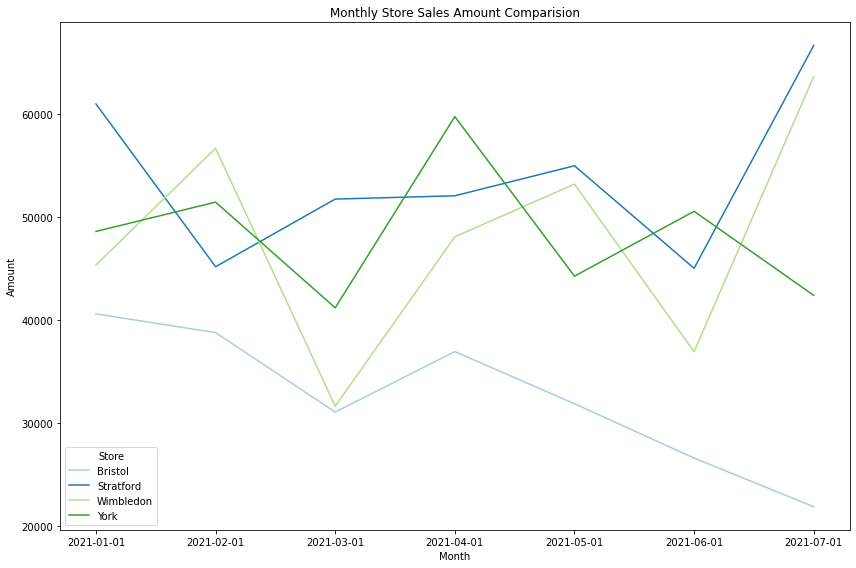

In [106]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, y="Amount", x="Month", hue="Store", palette="Paired")
plt.title("Monthly Store Sales Amount Comparision")
plt.tight_layout()
plt.show()

### Who met the most target sales amount monthly?

In [131]:
grouped = employee_sales.melt(id_vars=["Store", "Employee"], var_name="Month", value_name="Amount")
grouped = grouped.merge(employee_targets, how="left", on=["Store", "Employee"])
grouped["Target met"] = grouped["Amount"] > grouped["Monthly Target"]
grouped

,Store,Employee,Month,Amount,Monthly Target,Target met
0,Stratford,Julie,2021-01-01,3302,5000,False
1,Stratford,Pete,2021-01-01,4052,5000,False
2,Stratford,Jose,2021-01-01,5226,5000,True
3,Stratford,Andre,2021-01-01,9369,6000,True
4,Stratford,Edward,2021-01-01,7854,6000,True
...,...,...,...,...,...,...
240,York,Jessie,2021-07-01,7786,6000,True
241,York,Xavier,2021-07-01,3619,5000,False
242,York,Sam,2021-07-01,1129,4000,False
243,York,John,2021-07-01,3452,7000,False


In [133]:
grouped = grouped.groupby(["Store", "Employee"])["Target met"].sum().reset_index()
grouped = grouped.sort_values(by="Target met", ascending=False).reset_index(drop=True)
grouped["Rank"] = grouped["Target met"].rank(method="dense", ascending=False).astype(int)
grouped.head(10)

,Store,Employee,Target met,Rank
0,York,Edward,6,1
1,York,Jessie,5,2
2,Stratford,Ezra,5,2
3,Bristol,Cat,4,3
4,Stratford,Jessie,4,3
5,York,Sophie,4,3
6,Wimbledon,Victoria,4,3
7,Wimbledon,Lily,4,3
8,Wimbledon,Angus,4,3
9,Stratford,Pete,4,3


### Who performed the most in terms of sales amount in total?

In [134]:
grouped = employee_sales.groupby(["Store", "Employee"]).sum().sum(axis=1).reset_index().rename(columns={0: "Total amount"}).sort_values(by="Total amount", ascending=False)
grouped = grouped.reset_index(drop=True)
grouped.head(10)

,Store,Employee,Total amount
0,Bristol,Olivia,47133
1,Bristol,Cat,46722
2,York,John,46259
3,York,Jessie,44731
4,Stratford,Isla,44585
5,Stratford,Patrick,44489
6,Stratford,Edward,42388
7,Wimbledon,Angus,41456
8,Stratford,Andre,41354
9,Wimbledon,Pete,40406
